# 1. Podział danych - prosty i warstwowy

In [121]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt

In [130]:
datasets_list = {
        'iris': 'load_iris',
        'digits': 'load_digits',
        'wine': 'load_wine',
        'diabetes': "load_diabetes",
        'kddcup99': "fetch_kddcup99",
        'california': "fetch_california_housing",
    }

In [131]:
from importlib import import_module

def get_dataset(name: str) -> pd.DataFrame:
    dataset_module = import_module(f'sklearn.datasets')
    for key, value in datasets_list.items():
        if key == name:
            load_function = getattr(dataset_module, value)
            dataset = load_function()
    df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df

data = get_dataset('california')  
data    

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<h5> b. Dokonać podziału podzbioru treningowego w stosunku 80%:20% przeznaczając 20% na podzbiór walidacyjny, gdzie pozostałe 80% nadal będzie stanowiło podzbiór treningowy, lecz okrojony.</h5>

## podział prosty

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# podział całego zbioru na kolumnę z atrybutem decyzyjnym y i pozostałe kolumny warunkowe X
# Podział na cechy i target
X = data.iloc[:, :-1] # atrybuty warunkowe - cechy
y = data.iloc[:, -1] # kolumna z atrybutem decyzyjnym - target
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [65]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [67]:
y_train

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: target, Length: 16512, dtype: float64

In [68]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [69]:
assert len(X_test) == len(y_test)

In [70]:
assert len(X_train) == len(y_train)

In [71]:
# wydzielenie podzbioru walidacyjnego z treningowego
X_train_cut, X_val, y_train_cut, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42, shuffle=True)
X_train_cut.shape, y_train_cut.shape, X_val.shape, y_val.shape

((13209, 8), (13209,), (3303, 8), (3303,))

## podział warstwowy

In [72]:
from sklearn.model_selection import StratifiedShuffleSplit

In [73]:
# wygenerujemy nowy atrybut decyzyjny, który będzie zawierał wartości 0 i 1 w proporcji 50%:50%
data_size = len(data)
half_data_size = data_size // 2
data['decision'] = np.array([0] * half_data_size + [1] * half_data_size)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,decision
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,1
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,1


In [74]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=.2, random_state=42)

decision_col = 'decision'

X_w = data.loc[:, data.columns != decision_col]
y_w = data[decision_col]

for train_idx, test_idx in splitter.split(X_w, y_w):
    X_train_w = X_w.iloc[train_idx]
    X_test_w = X_w.iloc[test_idx]
    y_train_w = y_w[train_idx]
    y_test_w = y_w[test_idx]
    
# print(f'{X_train.shape} \n --------- {y_train.shape}\n-------------------')
# print(f'{X_test.shape} \n --------- {y_test.shape}\n-------------------')

# for train_idx, test_idx in splitter.split(X, y):
#   print(f'{len(train_idx)}, {len(test_idx)}\n------------------\n')
X_train_w.shape,X_test_w.shape ,y_train_w.shape,y_test_w.shape   

((16512, 9), (4128, 9), (16512,), (4128,))

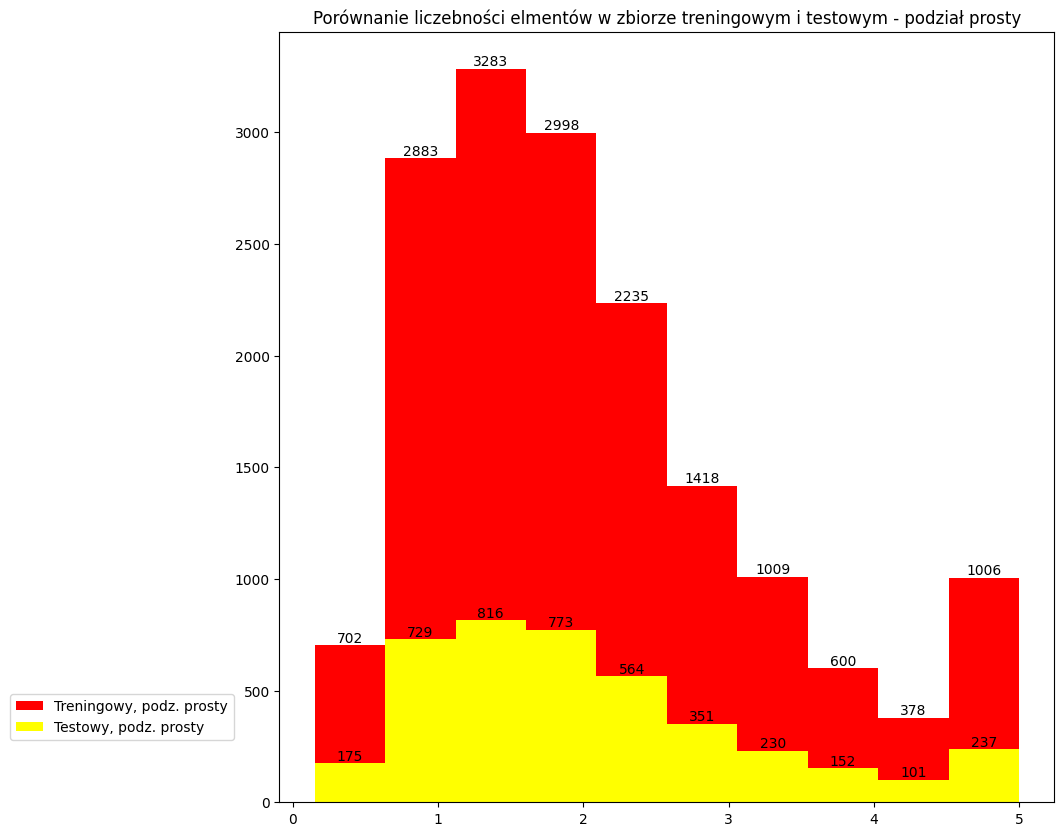

In [75]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(y_train, label='Treningowy, podz. prosty', color='red')
ax.hist(y_test, label='Testowy, podz. prosty', color='yellow')
ax.legend(loc='best', bbox_to_anchor=(-0.05, 0.15))
for count in ax.containers:
    ax.bar_label(count)
ax.set_title('Porównanie liczebności elmentów w zbiorze treningowym i testowym - podział prosty')

plt.show()

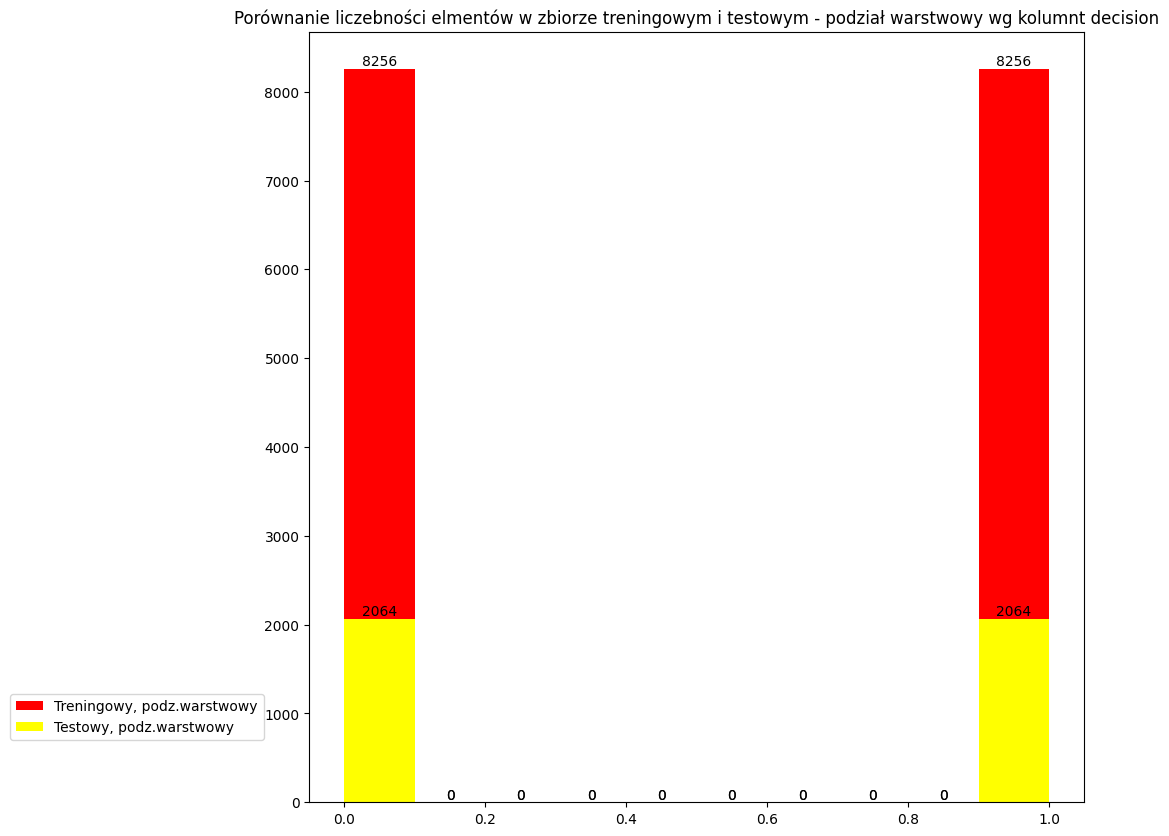

In [113]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(y_train_w, label='Treningowy, podz.warstwowy', color='red')
ax.hist(y_test_w, label='Testowy, podz.warstwowy', color='yellow')
ax.legend(loc='best', bbox_to_anchor=(-0.05, 0.15))
for count in ax.containers:
    ax.bar_label(count)
ax.set_title(f'Porównanie liczebności elmentów w zbiorze treningowym i testowym - podział warstwowy wg kolumnt {decision_col}')

plt.show()

<h5> c. Dla przeprowadzonych podziałów metodą prostą oraz warstwową (dla każdego podziału) przygotować histogram prezentujący rozkład liczebności wartości atrybutu decyzyjnego zarówno w podzbiorze treningowym, jak i testowym.</h5>

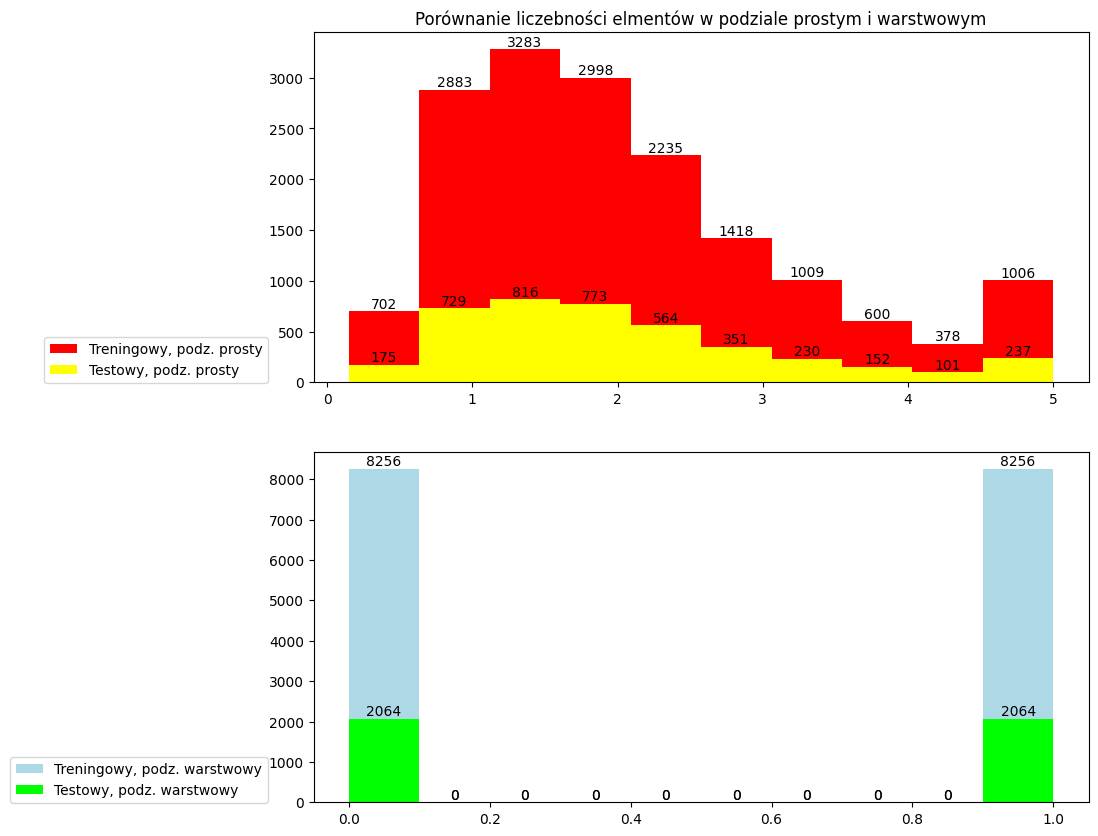

In [77]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].hist(y_train, label='Treningowy, podz. prosty', color='red')
ax[0].hist(y_test, label='Testowy, podz. prosty', color='yellow')
ax[0].legend(loc='best', bbox_to_anchor=(-0.05, 0.15))
for count in ax[0].containers:
    ax[0].bar_label(count)
ax[1].hist(y_train_w, label='Treningowy, podz. warstwowy', color='lightblue')
ax[1].hist(y_test_w, label='Testowy, podz. warstwowy', color='lime')
ax[1].legend(loc='best', bbox_to_anchor=(-0.05, 0.15))
for count in ax[1].containers:
    ax[1].bar_label(count)
ax[0].set_title('Porównanie liczebności elmentów w podziale prostym i warstwowym')
plt.show()

# Zad. 4
Dokonać podziału oryginalnego zbioru danych metodą warstwową względem innego atrybutu (obecnego w pierwotnej wersji zbioru). Jakiego atrybutu i dlaczego warto użyć? Dopuszczalne są niewielkie i uzasadnione zmiany wartości atrybutu stanowiącego źródło proporcji podziału.

In [132]:
# Wczytanie zbioru
#data2 = data.iloc[:,:-1]
data2 = data
data2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [137]:
output_col = 'target'

In [138]:
# Podział na cechy i target
X_2 = data2.loc[:, data2.columns != output_col]
y_2 = data2[output_col]

y_2.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64

In [139]:
# grupowanie na n części wartości z kolumny targetowej
def group_target(y, n=10):
    """Grupowanie wartości targetu będącego zbiorem liczb rzeczywistych.
    """
    y_cat = np.linspace(y.min(), y.max(), n + 1)
    for idx in range(y.shape[0]):
        for category in range(1, len(y_cat)):
            if y[idx] <= y_cat[category]:
                y[idx] = int(category)
                break
    return y
out = group_target(y_2)
out.describe()

count    20640.000000
mean         4.434157
std          2.332945
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         10.000000
Name: target, dtype: float64

In [140]:
splitter2 = StratifiedShuffleSplit(test_size=.2, random_state=42)

for train_idx, test_idx in splitter2.split(X_2, y_2):
    X_train_w2 = X_2.iloc[train_idx]
    y_train_w2 = y_2.iloc[train_idx]
    X_test_w2 = X_2.iloc[test_idx]
    y_test_w2 = y_2.iloc[test_idx]

X_train_w2.shape,X_test_w2.shape ,y_train_w2.shape,y_test_w2.shape

((16512, 8), (4128, 8), (16512,), (4128,))

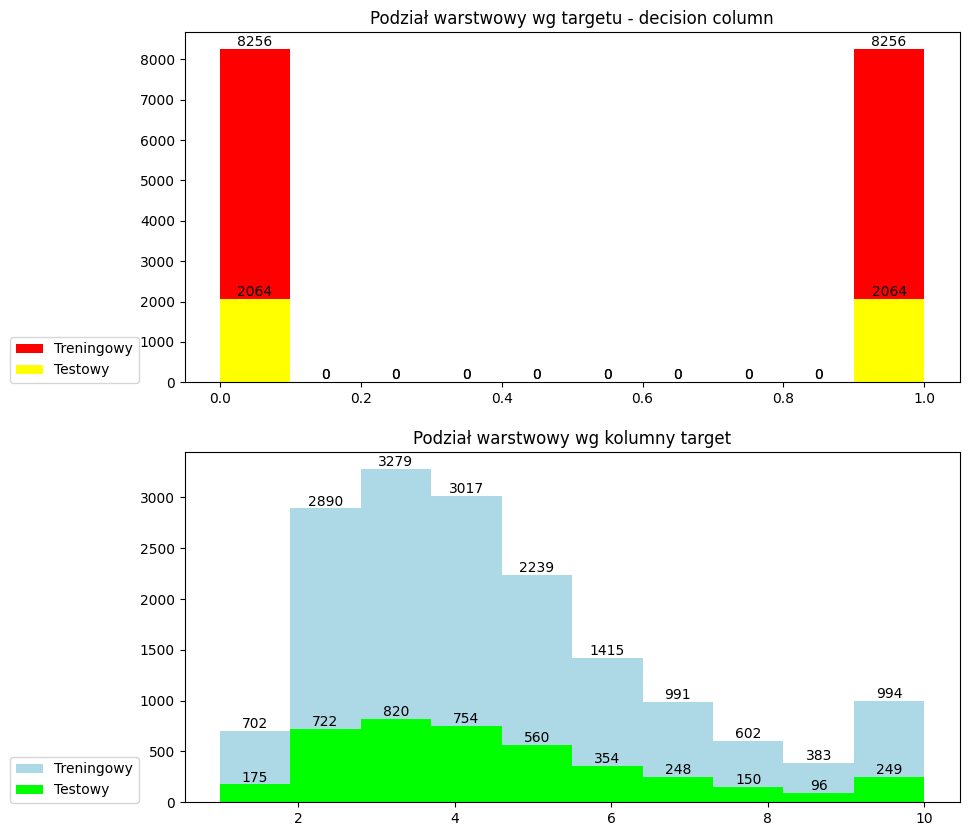

In [141]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].hist(y_train_w, label='Treningowy', color='red')
ax[0].hist(y_test_w, label='Testowy', color='yellow')
ax[0].legend(loc='best', bbox_to_anchor=(-0.05, 0.15))
for count in ax[0].containers:
    ax[0].bar_label(count)
ax[1].hist(y_train_w2, label='Treningowy', color='lightblue')
ax[1].hist(y_test_w2, label='Testowy', color='lime')
ax[1].legend(loc='best', bbox_to_anchor=(-0.05, 0.15))
for count in ax[1].containers:
    ax[1].bar_label(count)
ax[0].set_title(f'Podział warstwowy wg targetu - {decision_col} column')
ax[1].set_title(f'Podział warstwowy wg kolumny {output_col}')
plt.show()